# hello world of computer vision mnist

In [1]:
import numpy as  np
import matplotlib.pyplot as plt
from keras.datasets import mnist
import random
import seaborn as sns 


Using TensorFlow backend.


In [2]:
(xtr,ytr),(xts,yts) = mnist.load_data()

In [3]:
y_true = yts

In [4]:
#plt.imshow(xtr[0])
#plt.title(ytr[0])
#plt.show()

In [5]:
print('xtr shape',xtr.shape,sep=':')
print('ytr shape',ytr.shape,sep=':')


xtr shape:(60000, 28, 28)
ytr shape:(60000,)


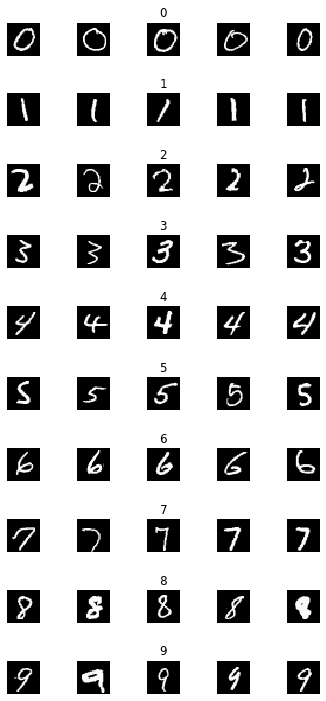

In [6]:
n_cols = 5
n_classes = 10

fig , axes = plt.subplots(nrows=n_classes,ncols=n_cols,figsize=(5,10))
fig.tight_layout()

for i in range(n_cols) :
    for j in range(n_classes):
        images = xtr[ytr==j]
        selected_image = images[random.randint(0,(len(images)-1)),:,:]
        axes[j][i].imshow(selected_image,cmap='gray')
        axes[j][i].axis('off')
        if i == 2 :
            axes[j][i].set_title(str(j))

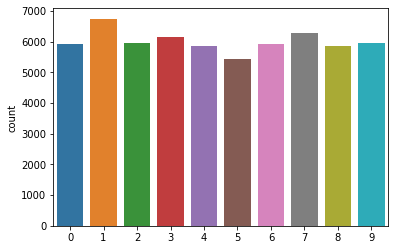

In [7]:
sns.countplot(ytr)
plt.show()

#  Image Augmentation
<br>
creating new images from existing images  
<br>
by distorting them (adding noise , rotate , zoom in zoom out etc)

# Pre - processing  

In [8]:
n_pixels = xtr.shape[1]*xtr.shape[2]
xtr = xtr.reshape(xtr.shape[0],n_pixels)
xtr = xtr/255 # brings value b/w 0 and 1
xts = xts.reshape(xts.shape[0],n_pixels)
xts = xts/255 




# onehotEncoding ytr array

In [9]:
from keras.utils.np_utils import to_categorical
ytr = to_categorical(ytr,10)
yts = to_categorical(yts,10)

# creating neural model

In [10]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam


In [11]:
def create_model() :
    model = Sequential()
    model.add(Dense(32,input_dim=n_pixels,activation = 'relu'))
    model.add(Dense(64,input_dim=n_pixels,activation = 'relu'))
    model.add(Dense(10,activation='softmax')) # activation for 
    model.compile(Adam(lr=0.01),loss ='categorical_crossentropy', metrics = ['accuracy'])
    return model

model = create_model()
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                650       
Total params: 27,882
Trainable params: 27,882
Non-trainable params: 0
_________________________________________________________________
None


In [12]:
h = model.fit(xtr,ytr,epochs=10,verbose=1,validation_data=(xts,yts))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 7s 116us/step - loss: 0.3042 - accuracy: 0.9091 - val_loss: 0.2210 - val_accuracy: 0.9356
Epoch 2/10
60000/60000 [==============================] - 6s 95us/step - loss: 0.2206 - accuracy: 0.9379 - val_loss: 0.2296 - val_accuracy: 0.9369
Epoch 3/10
60000/60000 [==============================] - 6s 100us/step - loss: 0.1944 - accuracy: 0.9449 - val_loss: 0.2112 - val_accuracy: 0.9448
Epoch 4/10
60000/60000 [==============================] - 6s 102us/step - loss: 0.1848 - accuracy: 0.9493 - val_loss: 0.2181 - val_accuracy: 0.9426
Epoch 5/10
60000/60000 [==============================] - 6s 94us/step - loss: 0.1737 - accuracy: 0.9511 - val_loss: 0.1865 - val_accuracy: 0.9540
Epoch 6/10
60000/60000 [==============================] - 6s 99us/step - loss: 0.1667 - accuracy: 0.9543 - val_loss: 0.1857 - val_accuracy: 0.9522
Epoch 7/10
60000/60000 [==============================] - 7s 115u

In [13]:
# to save the model trained in .h5 using tensorflow
model.save('model.h5')

#  Predicting images

In [14]:
import cv2
img = cv2.imread(r"D:\Datasets\digit.png")

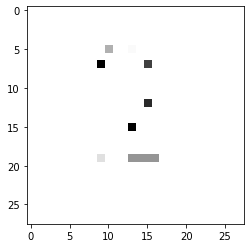

In [15]:
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
img = cv2.resize(img,(28,28))
plt.imshow(img,cmap='gray')
plt.show()

In [16]:

img = img.reshape(1,n_pixels)
img = img/255
model.predict_classes(img)

array([3], dtype=int64)

# to download file from colab <br>
model.save('ddjdj.h5')<br>
from google colab import filer<br>
filer.download('ddjdj.h5')

#  Image Augmentation

In [17]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rotation_range=10,zoom_range=0.1,shear_range=0.1,width_shift_range=0.1,height_shift_range=0.1,brightness_range=(0.1,1))



In [18]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict_classes(xts)
print(confusion_matrix(y_true,y_pred))

[[ 951    0   13    1    1    0    5    2    7    0]
 [   0 1107    2    5    1    0    7    1   12    0]
 [   0    2  985   15    1    0    2   10   16    1]
 [   1    0   14  967    0    3    0    4   12    9]
 [   1    1   10    0  950    0    3    2    5   10]
 [   4    0    4   45    3  797    3    0   25   11]
 [   7    2    3    1    7   15  915    0    8    0]
 [   0    7   15    4    5    0    0  975    8   14]
 [   3    0   10   10    5    4    3    4  927    8]
 [   1    4    1   11   25    2    0    7    7  951]]
